In [30]:
import os.path

import pandas as pd


def analyse_datalog_file(file_path):
    file_path = file_path
    # 初始化数据存储
    data = []

    # 读取文件内容并解析
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # 解析每一行并组织数据
    send_pkg_dict = {}
    node_pair_map = {}
    for line in lines:
        line = line.strip()
        if line.startswith("src:"):
            parts = line.split(", ")
            src = int(parts[0].split(": ")[1])
            dst = int(parts[1].split(": ")[1])
            if not (src, dst) in node_pair_map:
                node_pair_map[(src, dst)] = {}

            if 'sendPkgCount' in parts[2]:
                sendPkgCount = int(parts[2].split(": ")[1])
                node_pair_map[(src, dst)]['sendPkgCount'] = sendPkgCount

            else:
                avgDelay = float(parts[2].split(": ")[1])
                node_pair_map[(src, dst)]['avgDelay'] = avgDelay
                avgJitter = float(parts[3].split(": ")[1])
                node_pair_map[(src, dst)]['avgJitter'] = avgJitter

                pkgReceiveCount = int(parts[4].split(": ")[1])
                node_pair_map[(src, dst)]['pkgReceiveCount'] = pkgReceiveCount

    for k, v in node_pair_map.items():
        src, dst = k
        if 'avgDelay' not in v:
            data.append({
                'src': src,
                'dst': dst,
                'avgDelay': 5000,
                'avgJitter': 5000,
                'pkgLossRate': 1.0
            })
        else:
            data.append({
                'src': src,
                'dst': dst,
                'avgDelay': v['avgDelay'],
                'avgJitter': v['avgJitter'],
                'pkgLossRate': 1 - (v['pkgReceiveCount'] / v['sendPkgCount'])
            })

    # 创建 DataFrame
    df = pd.DataFrame(data, columns=['src', 'dst', 'avgDelay', 'avgJitter', 'pkgLossRate'])
    # 打印 DataFrame
    return df

In [24]:
time_dic = {'5m':'pkg_log_4096_5m.txt','1':'pkg_log_4096_1.txt','5':'pkg_log_4096_5.txt','10':'pkg_log_4096_10.txt','15':'pkg_log_4096_15.txt', '20':'pkg_log_4096_20.txt'}

pkg_dic = {'4k':'pkg_log_4k.txt','40k':'pkg_log_40k.txt', '400k':'pkg_log_400k.txt', '4m':'pkg_log_4m.txt', '40m':'pkg_log_40m.txt', '400m':'pkg_log_400m.txt'}

delay: {'5m': 2337.37, '1': 1931.44, '5': 6.08249, '10': 4.84545, '15': 4.49018, '20': 4.40656}
jitter: {'5m': 6.46096, '1': 3.44459, '5': 1.27623, '10': 0.739262, '15': 0.314423, '20': 0.224784}
plr: {'5m': 0.9287065617843274, '1': 0.7701604913810184, '5': 0.0009861932938856066, '10': 0.0, '15': 0.0, '20': 0.0}


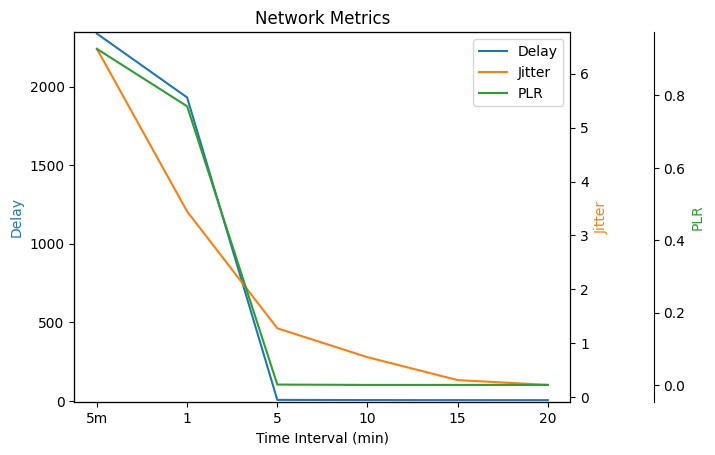

<Figure size 640x480 with 0 Axes>

In [45]:
from matplotlib import pyplot as plt

query_str = 'src == 1 and dst == 2'
delay_dic = {}
jitter_dic = {}
plr_dic = {}

for k,v in time_dic.items():
    log_path = os.path.join('result', 'time', v)
    df = analyse_datalog_file(log_path)
    result = df.query(query_str).head(1)
    result_dict = result.to_dict(orient='records')[0]


    delay_dic[k] = result_dict['avgDelay']
    jitter_dic[k] = result_dict['avgJitter']
    plr_dic[k] = result_dict['pkgLossRate']

print('delay:',delay_dic)
print('jitter:',jitter_dic)
print('plr:',plr_dic)

x_values = delay_dic.keys()

# 提取y轴数据
delay_values = [delay_dic[key] for key in delay_dic.keys()]
jitter_values = [jitter_dic[key] for key in jitter_dic.keys()]
plr_values = [plr_dic[key] for key in plr_dic.keys()]

fig, ax1 = plt.subplots()

# 绘制Delay曲线
ax1.plot(x_values, delay_values, color='tab:blue', label='Delay')
ax1.set_xlabel('Time Interval (min)')
ax1.set_ylabel('Delay', color='tab:blue')
ax1.set_ylim(min(delay_values) - 10, max(delay_values) + 10)

# 创建第二个y轴并共享x轴
ax2 = ax1.twinx()

# 绘制Jitter曲线
ax2.plot(x_values, jitter_values, color='tab:orange', label='Jitter')
ax2.set_ylabel('Jitter', color='tab:orange')

# 创建第三个y轴并共享x轴
ax3 = ax1.twinx()

# 移动第三个y轴的位置
ax3.spines['right'].set_position(('outward', 60))

# 绘制PLR曲线
ax3.plot(x_values, plr_values, color='tab:green', label='PLR')
ax3.set_ylabel('PLR', color='tab:green')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

# 显示图形
plt.title('Network Metrics')
plt.show()

plt.savefig('./pkg_plot.png')
plt.clf()

result/pkg/pkg_log_4k.txt
result/pkg/pkg_log_40k.txt
result/pkg/pkg_log_400k.txt
result/pkg/pkg_log_4m.txt
result/pkg/pkg_log_40m.txt
result/pkg/pkg_log_400m.txt
delay: {'4k': 4.5634, '40k': 1820.23, '400k': 2874.55, '4m': 5000.0, '40m': 5000.0, '400m': 5000.0}
jitter: {'4k': 0.49043, '40k': 30.364, '400k': 0.0, '4m': 5000.0, '40m': 5000.0, '400m': 5000.0}
plr: {'4k': 0.001953125, '40k': 0.7373949579831933, '400k': 0.9978813559322034, '4m': 1.0, '40m': 1.0, '400m': 1.0}


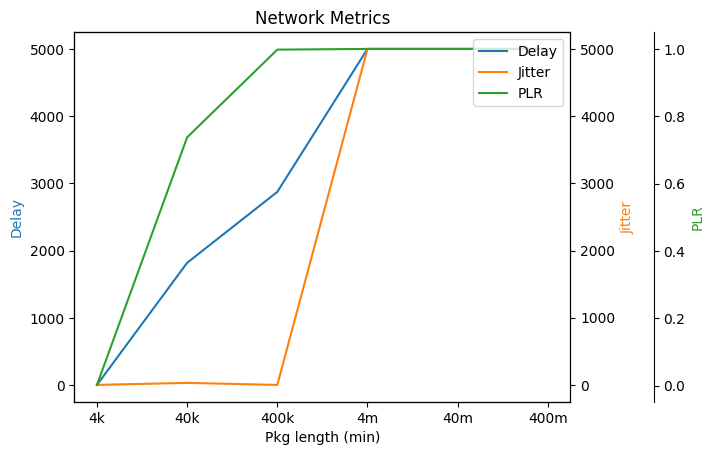

<Figure size 640x480 with 0 Axes>

In [44]:
from matplotlib import pyplot as plt

query_str = 'src == 1 and dst == 2'
delay_dic = {}
jitter_dic = {}
plr_dic = {}

for k,v in pkg_dic.items():
    log_path = os.path.join('result', 'pkg', v)
    print(log_path)
    df = analyse_datalog_file(log_path)
    result = df.query(query_str).head(1)
    result_dict = result.to_dict(orient='records')[0]


    delay_dic[k] = result_dict['avgDelay']
    jitter_dic[k] = result_dict['avgJitter']
    plr_dic[k] = result_dict['pkgLossRate']

print('delay:',delay_dic)
print('jitter:',jitter_dic)
print('plr:',plr_dic)

x_values = delay_dic.keys()

# 提取y轴数据
delay_values = [delay_dic[key] for key in delay_dic.keys()]
jitter_values = [jitter_dic[key] for key in jitter_dic.keys()]
plr_values = [plr_dic[key] for key in plr_dic.keys()]

fig, ax1 = plt.subplots()

# 绘制Delay曲线
ax1.plot(x_values, delay_values, color='tab:blue', label='Delay')
ax1.set_xlabel('Pkg length (min)')
ax1.set_ylabel('Delay', color='tab:blue')

# 创建第二个y轴并共享x轴
ax2 = ax1.twinx()

# 绘制Jitter曲线
ax2.plot(x_values, jitter_values, color='tab:orange', label='Jitter')
ax2.set_ylabel('Jitter', color='tab:orange')

# 创建第三个y轴并共享x轴
ax3 = ax1.twinx()

# 移动第三个y轴的位置
ax3.spines['right'].set_position(('outward', 60))

# 绘制PLR曲线
ax3.plot(x_values, plr_values, color='tab:green', label='PLR')
ax3.set_ylabel('PLR', color='tab:green')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

# 显示图形
plt.title('Network Metrics')
plt.show()
plt.savefig('./pkg_plot.png')
plt.clf()